In [1]:
%pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST

import torchvision
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
# train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
#     transforms.ToTensor(), # ToTensor does min-max normalization. 
# ]), )

# test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
#     transforms.ToTensor(), # ToTensor does min-max normalization. 
# ]), )

# # Create DataLoader
# dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
# train_loader = dataloader.DataLoader(train, **dataloader_args)
# test_loader = dataloader.DataLoader(test, **dataloader_args)


# https://www.marktechpost.com/2019/07/30/introduction-to-image-classification-using-pytorch-to-classify-fashionmnist-dataset/

#transforming the PIL Image to tensors
trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())
testset = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transforms.ToTensor())


0it [00:00, ?it/s]

26427392it [00:01, 14296482.31it/s]                             


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 100210.39it/s]                           
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4281120.05it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 33894.54it/s]            

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
#loading the training data from trainset
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)
# #loading the test data from testset
# testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)


dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = dataloader.DataLoader(trainset, **dataloader_args)
test_loader = dataloader.DataLoader(testset, **dataloader_args)




In [0]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')
def imshow(img):
     npimg = img.numpy() #convert the tensor to numpy for displaying the image
     #for displaying the image, shape of the image should be height * width * channels 
     plt.imshow(np.transpose(npimg, (1, 2, 0))) 
     plt.show()

In [65]:
imshow(torchvision.utils.make_grid(images))

NameError: ignored

In [70]:
next(iter(trainloader))[0].shape

torch.Size([4, 1, 28, 28])

In [9]:
test.data.shape

AttributeError: ignored

In [0]:
class LeNet(nn.Module):
     def __init__(self):
         super(LeNet, self).__init__()
         self.cnn_model = nn.Sequential(
             nn.Conv2d(1, 6, kernel_size = 5), #(N, 1, 28, 28) -> (N, 6, 24, 24)
             nn.Tanh(),
             nn.AvgPool2d(2, stride = 2), #(N, 6, 24, 24) -> (N, 6, 12, 12)
             nn.Conv2d(6, 16, kernel_size = 5), #(N, 6, 12, 12) -> (N, 6, 8, 8)
             nn.Tanh(),
             nn.AvgPool2d(2, stride = 2)) #(N, 6, 8, 8) -> (N, 16, 4, 4)
#          self.cnn_model = nn.Sequential(
         self.fc_model = nn.Sequential(
             nn.Linear(256, 120), # (N, 256) -> (N, 120)
             nn.Tanh(),
             nn.Linear(120, 84), # (N, 120) -> (N, 84)
             nn.Tanh(),
             nn.Linear(84, 10))  # (N, 84)  -> (N, 10)) #10 classes
      
     def forward(self, x):
           x = self.cnn_model(x)     
           x = x.view(x.size(0), -1)     
           x = self.fc_model(x)     
           return x
          
# # model = Model()
# # if cuda:
# #     model.cuda() # CUDA!
# # optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [0]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 40, 5, 1)
        self.conv2 = nn.Conv2d(40, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3)    
# print(torch.cuda.device_count())
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [7]:
# #create the model object and move it to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

NameError: ignored

In [10]:
from torchsummary import summary
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# vgg = models.vgg16().to(device)
# summary(net, (1, 28, 28))
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 40, 24, 24]           1,040
            Conv2d-2             [-1, 50, 8, 8]          50,050
            Linear-3                 [-1, 1000]         801,000
            Linear-4                   [-1, 10]          10,010
Total params: 862,100
Trainable params: 862,100
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.21
Params size (MB): 3.29
Estimated Total Size (MB): 3.50
----------------------------------------------------------------


In [11]:
EPOCHS = 15
losses = []

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data), Variable(target)
        
        if cuda:
            data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data) 

        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
    evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = Variable(test_loader.dataset.test_labels)
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output = model(evaluate_x[:,None,...])
    pred = output.data.max(1)[1]
    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))



# # function to do evaluation (calculate the accuracy) in gpu
# def evaluation(dataloader):
#      total, correct = 0, 0
#      #keeping the network in evaluation mode 
#      net.eval()
#      for data in dataloader:
#          inputs, labels = data
#          #moving the inputs and labels to gpu
#          inputs, labels = inputs.to(device), labels.to(device)
#          outputs = net(inputs)
#          _, pred = torch.max(outputs.data, 1)
#          total += labels.size(0)
#          correct += (pred == labels).sum().item()
#      return 100 * correct / total

 Train Epoch: 1/15 [60000/60000 (100%)]	Loss: 1.709010	 Test Accuracy: 77.2800%


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


 Train Epoch: 2/15 [60000/60000 (100%)]	Loss: 1.627890	 Test Accuracy: 78.6100%
 Train Epoch: 3/15 [60000/60000 (100%)]	Loss: 1.601566	 Test Accuracy: 84.9700%
 Train Epoch: 4/15 [60000/60000 (100%)]	Loss: 1.597577	 Test Accuracy: 85.0000%
 Train Epoch: 5/15 [60000/60000 (100%)]	Loss: 1.576257	 Test Accuracy: 86.8500%
 Train Epoch: 6/15 [60000/60000 (100%)]	Loss: 1.581382	 Test Accuracy: 82.9400%
 Train Epoch: 7/15 [60000/60000 (100%)]	Loss: 1.608374	 Test Accuracy: 86.2000%
 Train Epoch: 8/15 [60000/60000 (100%)]	Loss: 1.549301	 Test Accuracy: 84.3000%
 Train Epoch: 9/15 [60000/60000 (100%)]	Loss: 1.517467	 Test Accuracy: 84.5400%
 Train Epoch: 10/15 [60000/60000 (100%)]	Loss: 1.575722	 Test Accuracy: 85.8100%
 Train Epoch: 11/15 [60000/60000 (100%)]	Loss: 1.514408	 Test Accuracy: 87.6100%
 Train Epoch: 12/15 [60000/60000 (100%)]	Loss: 1.538979	 Test Accuracy: 87.2000%
 Train Epoch: 13/15 [60000/60000 (100%)]	Loss: 1.561146	 Test Accuracy: 87.0600%
 Train Epoch: 14/15 [60000/60000 (10

In [44]:
# # torch.save(model,os.path.join(save_path, 'cnn.pth'))
# # torch.save(model.state_dict(), os.path.join(save_path, 'cnn_state.pth'))

# # %%time
#  loss_arr = []
#  loss_epoch_arr = []
#  max_epochs = 10
#  for epoch in range(max_epochs):
#      #iterate through all the batches in each epoch
#      for i, data in enumerate(trainloader, 0):
#      #keeping the network in training mode     
#        net.train()     
#        inputs, labels = data     
#        #moving the input and labels to gpu     
#        inputs, labels = inputs.to(device), labels.to(device)     
#        #clear the gradients     
#        opt.zero_grad()     
#        #forward pass     
#        outputs = net(inputs)      
#        loss = loss_fn(outputs, labels)     
#        #backward pass     
#        loss.backward()     
#        opt.step()     
#        loss_arr.append(loss.item())
#      loss_epoch_arr.append(loss.item()) 

RuntimeError: ignored

In [86]:
inputs[2].shape

torch.Size([1, 28, 28])

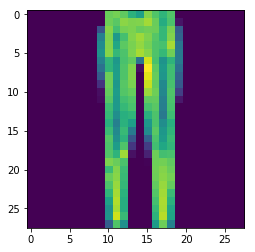

In [87]:
plt.imshow(inputs[0,0].cpu().numpy())

In [0]:
save_path

NameError: ignored

In [12]:
evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = Variable(test_loader.dataset.test_labels)
if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

model.eval()
output = model(evaluate_x[:,None,...])
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

print('Accuracy:', accuracy*100)

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: tensor(86.6100, dtype=torch.float64)


In [84]:
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())

array([[856,   2,  20,  26,   0,  20, 138,   8,   3,   0],
       [  2, 980,   5,  12,   1,   1,   3,   2,   2,   0],
       [ 16,   0, 681,  10,  12,  78,  34,   9,   4,   1],
       [ 20,  13,  13, 885,  33,   4,  28,   6,   6,   3],
       [ 10,   2, 191,  32, 921,   0, 190,   1,   9,   0],
       [  0,   0,   0,   0,   0, 846,   1,  33,   0,   4],
       [ 77,   1,  87,  28,  30,   9, 593,  12,   7,   2],
       [  0,   0,   0,   0,   0,   7,   0, 867,   0,  14],
       [ 19,   2,   3,   6,   3,  21,  13,   8, 969,   2],
       [  0,   0,   0,   1,   0,  14,   0,  54,   0, 974]])

In [0]:
# uploading the GAN trained model

save_path = 'drive/My Drive/classification_images'



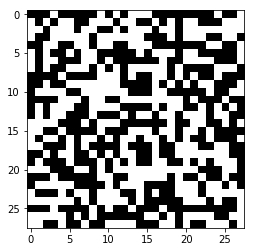

In [0]:
 z = torch.rand(10, 1, 28, 28) #.cuda()
 z[z<.5] = 0
 z[z>=.5] = 1
  
 plt.imshow(z[1].reshape(28,28), cmap = 'gray')

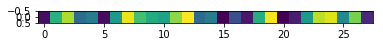

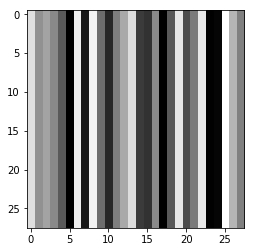

In [0]:
z = torch.rand(10, 1, 28) #.cuda()
# z[z<.5] = 0
# z[z>=.5] = 1
  
plt.imshow(z[1])

zz = torch.stack(28*[z], dim=2)
zz.shape

plt.figure()
plt.imshow(zz[4,0], cmap = 'gray')





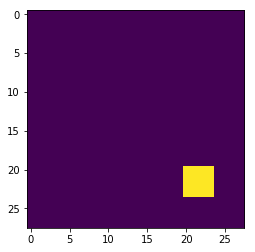

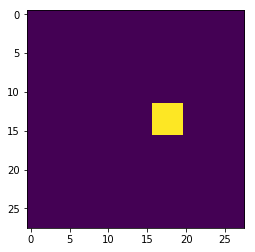

In [0]:
# z = torch.rand(10, 1, 28, 28) #.cuda()
z = np.zeros((10, 1, 7, 7)) #.cuda()
# z[z<.5] = 0
# z[z>=.5] = 1

idx_x = np.random.randint(0,6,(10,))
idx_y = np.random.randint(0,6,(10,))
idx_r = np.random.randint(0,9,(10,))

# idxs = np.radnom.rand()
# idx1 = torch.randint(0,9,(10,2))

# plt.imshow(z[1])

# zz = torch.stack(28*[z], dim=2)
# zz.shape
# z[0,0,idxs[0,0], idxs[0,1]] = 1
# z[:,0,idxs[:0],idxs[:1]] = 1
z[range(10),0,idx_x,idx_y] = 1

z = torch.from_numpy(z)
upsample = nn.Upsample(scale_factor=4, mode='nearest')
z = upsample(z)


plt.figure()
plt.imshow(z[4,0])
# idxs[:,1]
plt.figure()
plt.imshow(z[2,0])


In [0]:
# z.shape
np.random.rand(5,3)

# ar = np.random.rand(2, 3, 5)
# xs = np.array([0, 1, 0, 0, 1])
# ys = np.array([0, 1, 2, 3, 4])
# res = np.random.rand(5,3)
ar[xs, :, ys].shape

(5, 3)

In [0]:
ar[0,...].shape

(3, 5)

In [0]:
# # black and white patterns

# batch_size = 10000
# all_size = 100000


# iters = 10

# stats = dict()
# for i in range(10):
#     stats[i] = 0
    
    
# avgs = torch.zeros(iters, 10, 28*28)

# for kk in range(iters):
#   print(kk)
  
# #   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
#   z = torch.rand(all_size, 1, 28, 28) #.cuda()
# #   z[z<.5] = 0
# #   z[z<=.5] = 1
  
#   z.cuda()
#   #plt.imshow(z[1].reshape(28,28))


#   all_preds = []
#   all_confs = []
#   all_idx = torch.ones(all_size, dtype = torch.uint8)
#   for k in range(0,all_size, batch_size):
#       y_pred = model(z[k:k+batch_size].cuda())
#       #y_pred[y_pred < 0]= 0

#       indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
#       indices[torch.mean(y_pred, dim =1)==0] = 0 

#       all_idx[k:k+batch_size] = indices 
#       confs, pred = y_pred[indices==1].data.max(1)
      
#       all_preds.append(pred)
#       all_confs.append(confs)

#   pred = torch.cat(all_preds)
#   confs = torch.cat(all_confs)
  
#   for i in range(10):
#     stats[i] += torch.sum(pred==i)
  

#   tt = confs[:,None].repeat(1,784)
#   uu = z[all_idx].view(-1,28*28)
# #   z = z[all_idx]*confs
#   z = uu* tt.type(torch.FloatTensor)
#   z = z.view(-1,1,28,28)
  
#   for i in range(10):
#       a = torch.mean(z[pred==i] , dim=0) 
#       avgs[kk, i] = a.reshape(28*28)


In [0]:
# with random stripes  --> did not work
# zz = torch.stack(28*[z], dim=2)
# clean one

upsample = nn.Upsample(scale_factor=4, mode='nearest')


batch_size = 10000
all_size = 100000
iters = 10

stats = dict()
for i in range(10):
    stats[i] = 0    
    
avgs = torch.zeros(iters, 10, 28*28)

for kk in range(iters):
  print(kk)
  
#   z = torch.rand(all_size, 1, 28) #.cuda() 
#   z = torch.stack(28*[z], dim=2)   stripes
  z = np.zeros((all_size, 1, 7, 7)) #.cuda()

  idx_x = np.random.randint(0,6,(all_size,))
  idx_y = np.random.randint(0,6,(all_size,))
#   idx_r = np.random.randint(0,all_size-1,(all_size,))

  z[range(all_size),0,idx_x,idx_y] = 1

  z = torch.from_numpy(z)
  z = upsample(z)
  z = z.type(torch.FloatTensor)
  z.cuda()

  all_preds = []
  all_confs = []

  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      conf, pred = y_pred.data.max(1)
      
      
      all_preds.append(pred)
      all_confs.append(conf)
  
  preds = torch.cat(all_preds)
  confs = torch.cat(all_confs)    
  
#   weighting
  tt = confs[:,None].repeat(1,784)
  uu = z.view(-1,28*28)
  z = uu* tt.type(torch.FloatTensor)
  z = z.view(-1,1,28,28)

  for i in range(10):
    stats[i] += torch.sum(preds==i)
    a = torch.mean(z[preds==i] , dim=0) 
    avgs[kk, i] = a.reshape(28*28)


0
1
2
3
4
5
6
7
8
9


In [0]:
z.shape

torch.Size([100000, 1, 28, 28])

In [44]:
# clean one

batch_size = 10000
all_size = 1000000
iters = 10  #(total is iters * all_size)

stats = dict()
for i in range(10):
    stats[i] = 0    
    
avgs = torch.zeros(iters, 10, 28*28)

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 1, 28, 28) #.cuda()  
  z.cuda()

  all_preds = []
  all_confs = []

  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      conf, pred = y_pred.data.max(1)
      
      
      all_preds.append(pred)
      all_confs.append(conf)
  
  preds = torch.cat(all_preds)
  confs = torch.cat(all_confs)    
  
#   weighting
#   tt = confs[:,None].repeat(1,784)
#   uu = z.view(-1,28*28)
#   z = uu* tt.type(torch.FloatTensor)
  z = z.view(-1,1,28,28)

  for i in range(10):
    stats[i] += torch.sum(preds==i)
    a = torch.mean(z[preds==i] , dim=0) 
    avgs[kk, i] = a.reshape(28*28)


0
1
2
3
4
5
6
7
8
9


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
{0: tensor(52900, device='cuda:0'), 1: tensor(289, device='cuda:0'), 2: tensor(234775, device='cuda:0'), 3: tensor(36193, device='cuda:0'), 4: tensor(53767, device='cuda:0'), 5: tensor(2846, device='cuda:0'), 6: tensor(24, device='cuda:0'), 7: tensor(1435, device='cuda:0'), 8: tensor(9601045, device='cuda:0'), 9: tensor(1525, device='cuda:0')}


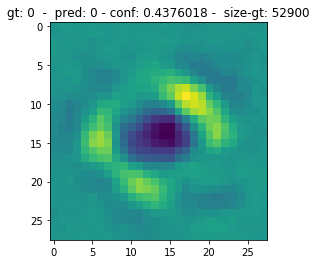

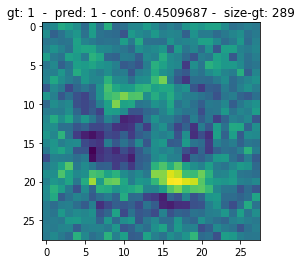

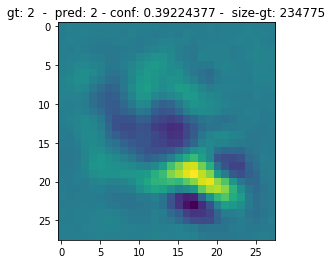

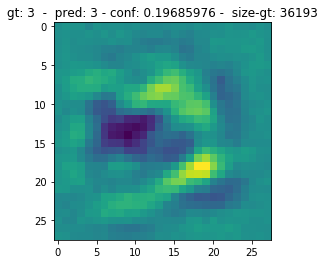

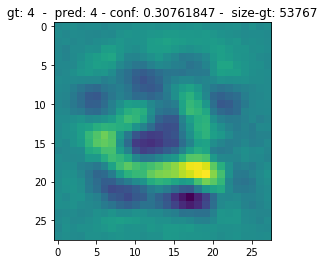

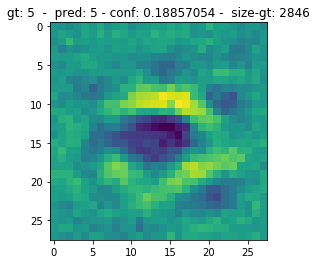

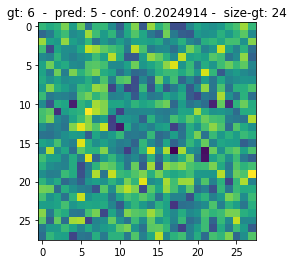

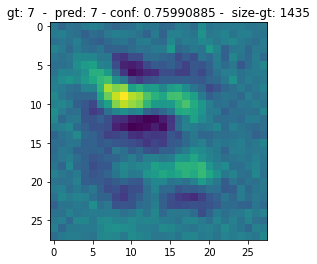

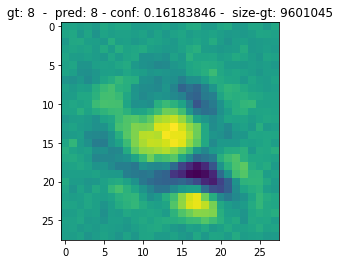

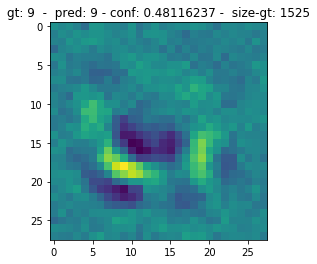

In [0]:
# based on confidence

batch_size = 10000
all_size = 100000
iters = 100

stats = dict()
for i in range(10):
    stats[i] = 0    
    
avgs = torch.zeros(iters, 10, 28*28)

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 1, 28, 28) #.cuda()  
  z.cuda()

  all_preds = []
  all_confs = []
  all_idx = torch.ones(all_size, dtype = torch.uint8)

  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      
      # erasing the low confident ones!
      y_pred[y_pred <= 0.3]= 0
      indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
      indices[torch.mean(y_pred, dim =1)==0] = 0 
      all_idx[k:k+batch_size] = indices 
      conf, pred = y_pred[indices==1].data.max(1)#[1]

      #if (not torch.isnan(conf).sum()) & (not torch.isnan(pred).sum())  :
      all_preds.append(pred)
      all_confs.append(conf)
  
  all_preds = torch.cat(all_preds)
  all_confs = torch.cat(all_confs)    
  
  # weighting
#   tt = confs[:,None].repeat(1,784)
#   uu = z.view(-1,28*28)
#   z = uu* tt.type(torch.FloatTensor)
#   z = z.view(-1,1,28,28)

# erasing the low confident ones!
  z = z[all_idx]
    
  for i in range(10):
    stats[i] += torch.sum(all_preds==i)
    a = torch.mean(z[all_preds==i] , dim=0) 
#     print(z[preds==i].shape)
    avgs[kk, i] = a.reshape(28*28)

  
  
  
  
  
print(stats)  
  
  
  
# plotting  
save_path = 'drive/My Drive/classification_images/10way-unweighted'
import os

# setting NANs to 0
avgs[avgs != avgs] = 0 

dd = torch.mean(avgs, dim=0)

#dd = dd - grand_mean
for kk in range(10):
  
  fig = plt.figure()
  a = dd[kk]
  a = a.view(-1,28)
  b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
  conf, c = b.data.max(1) #[1]
  plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} - conf: {str(conf.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
  plt.imshow(a) #, cmap = 'gray')
  #fig.savefig(os.path.join(save_path, str(kk)+'-.png'))
    
  

tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


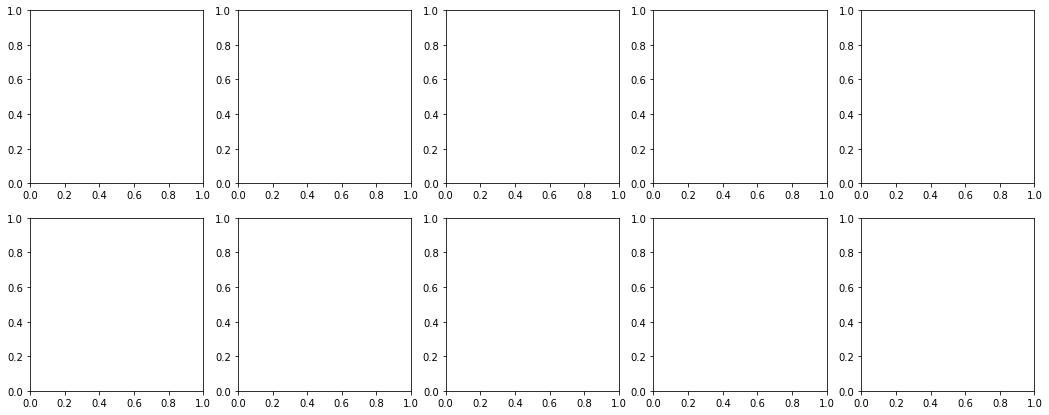

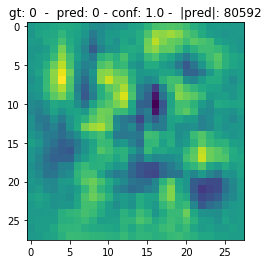

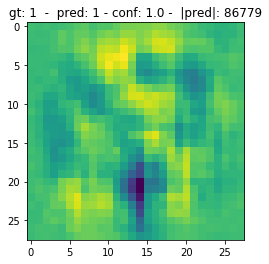

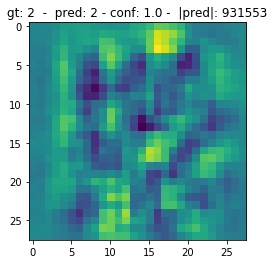

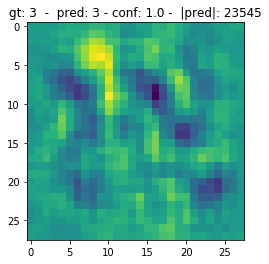

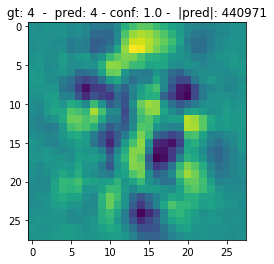

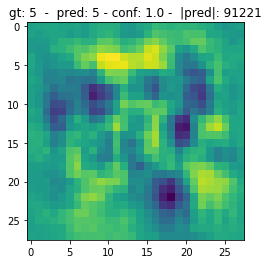

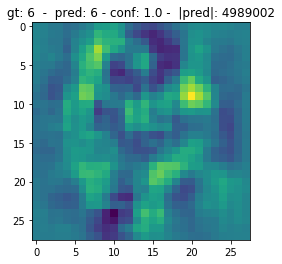

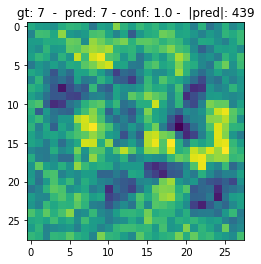

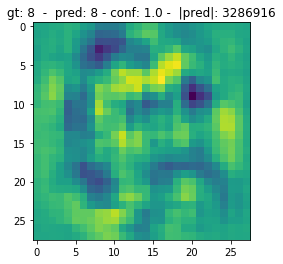

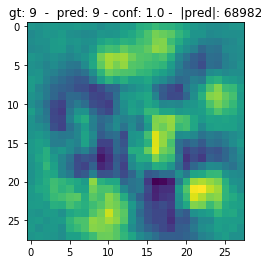

In [53]:
avgs[:,6]
# not torch.isnan(pred).sum()
# stats
# z[preds==1]
(preds==6)
# stats


avgs[:,6].shape


f, axarr = plt.subplots(2, 5)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(7)
f.set_figwidth(18)




# plotting  
save_path = 'drive/My Drive/classification_images/fashionMNIST/'
import os

# setting NANs to 0
avgs[avgs != avgs] = 0 

dd = torch.mean(avgs, dim=0)

#dd = dd - grand_mean
for kk in range(10):
  
  fig = plt.figure()
  a = dd[kk]
  
  a = (a -a.min()) / (a.max() -a.min())
  a = a.view(-1,28)
  
#   a[a<.4] = 0
#   a[a>=.8] = 1
  
  print(a.min(), a.max())
  b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
  conf, c = b.data.max(1) #[1]
  plt.imshow(a)
  plt.title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} - conf: {str(conf.cpu().data[0].numpy())} -  |pred|: {stats[kk]}')  
  fig.savefig(os.path.join(save_path, str(kk)+'-.png'))  
#   axarr[kk//5, kk%5].set_title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} - |pred|: {stats[kk]}')  
#   axarr[kk//5, kk%5].imshow(a) #, cmap = 'gray')
#   fig.savefig(os.path.join(save_path, str(kk)+'-.png'))

# f.savefig(os.path.join(save_path, '10M.png'))  

In [15]:
avgs.shape
dd.shape

torch.Size([10, 784])

In [0]:
# batch_size = 10000
# all_size = 100000

# stats = dict()
# for i in range(10):
#     stats[i] = 0
    
    
# avgs = torch.zeros(100, 10, 28*28)

# for kk in range(100):
#   print(kk)
  
# #   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
#   z = torch.rand(all_size, 1, 28, 28) #.cuda()
  
#   z.cuda()
#   #plt.imshow(z[1].reshape(28,28))


#   all_preds = []
#   all_idx = torch.ones(all_size, dtype = torch.uint8)
#   for k in range(0,all_size, batch_size):
#       y_pred = model(z[k:k+batch_size].cuda())
#       #y_pred[y_pred < 0]= 0

#       indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
#       indices[torch.mean(y_pred, dim =1)==0] = 0 

#       all_idx[k:k+batch_size] = indices 
#       pred = y_pred[indices==1].data.max(1)[1]

#       all_preds.append(pred)

#   pred = torch.cat(all_preds)

#   for i in range(10):
#     stats[i] += torch.sum(pred==i)
  
#   z = z[all_idx]
#   for i in range(10):
#       a = torch.mean(z[pred==i] , dim=0) 
#       avgs[kk, i] = a.reshape(28*28)


In [0]:
z = torch.rand(1000000, 784)
grand_mean = torch.mean(z,dim=0)

In [0]:
# torch.nn.functional.softmax(a)
# d = defaultdict()

NameError: ignored

In [46]:
stats

{0: tensor(80592, device='cuda:0'),
 1: tensor(86779, device='cuda:0'),
 2: tensor(931553, device='cuda:0'),
 3: tensor(23545, device='cuda:0'),
 4: tensor(440971, device='cuda:0'),
 5: tensor(91221, device='cuda:0'),
 6: tensor(4989002, device='cuda:0'),
 7: tensor(439, device='cuda:0'),
 8: tensor(3286916, device='cuda:0'),
 9: tensor(68982, device='cuda:0')}

In [48]:
# grand_mean.shape
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())


array([[  9,   8,  12,   7,   4,  13,  10,   9,   9,   7],
       [  7,   4,   8,   6,  10,   6,   9,   7,  11,  11],
       [ 78,  96,  77,  99,  77, 102,  99,  96,  82,  90],
       [  4,   2,   4,   0,   1,   2,   1,   7,   2,   1],
       [ 61,  44,  33,  52,  45,  40,  33,  44,  36,  38],
       [  6,   7,   9,  13,  11,  10,   4,   9,   4,  12],
       [502, 505, 518, 491, 513, 479, 491, 499, 509, 516],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [330, 324, 335, 326, 330, 337, 345, 324, 338, 320],
       [  3,  10,   4,   6,   9,  11,   8,   5,   9,   5]])

In [0]:
b.data.max(1)[1]
b
a.shape
# avgs

torch.Size([1, 28, 28])

In [47]:
for i in range(10):
    print(torch.sum(pred==i))  


tensor(88, device='cuda:0')
tensor(79, device='cuda:0')
tensor(896, device='cuda:0')
tensor(24, device='cuda:0')
tensor(426, device='cuda:0')
tensor(85, device='cuda:0')
tensor(5023, device='cuda:0')
tensor(0, device='cuda:0')
tensor(3309, device='cuda:0')
tensor(70, device='cuda:0')


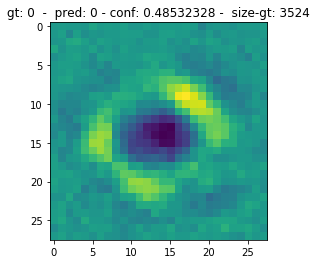

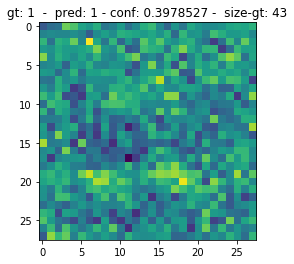

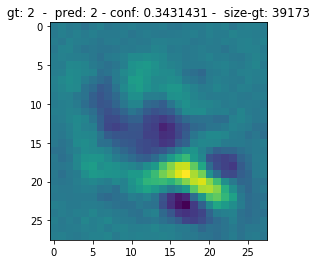

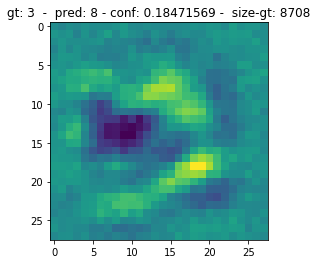

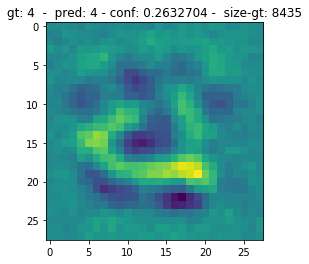

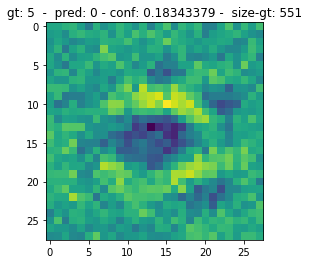

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


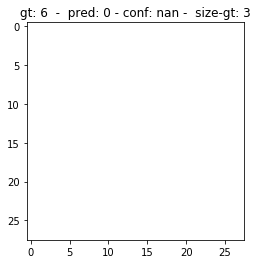

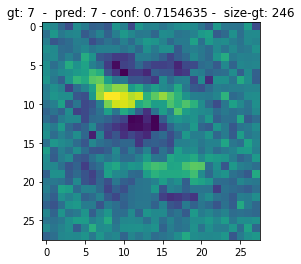

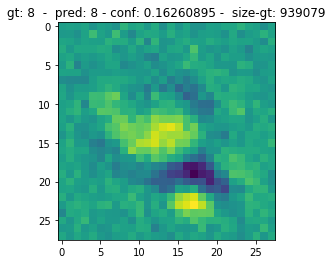

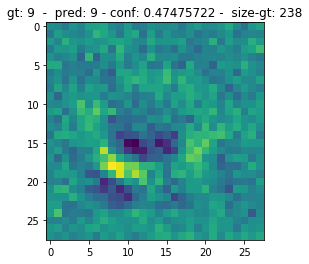

In [0]:
#   
# - load the model
# - modulate the input
# - see how many are classified as the pattern

import os

model = Model()
if cuda:
    model.cuda() # CUDA!
    
model = torch.load(os.path.join(save_path, 'cnn.pth'))



In [0]:
import torch.nn.functional as F
def resize2d(img, size):
    return (F.adaptive_avg_pool2d(Variable(img,volatile=True), size)).data

  
from skimage import io, transform  
import sklearn
from sklearn import metrics


import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # for reading image
import matplotlib.cm as cm


# https://stackoverflow.com/questions/25862026/turn-off-axes-in-subplots/25864515


tensor([8, 8, 2, 8, 6, 4, 5, 8, 8, 8, 8, 8, 5, 5, 8, 8, 2, 8, 3, 2, 8, 8, 8, 8,
        3, 8, 2, 0, 8, 8, 8, 8, 3, 8, 8, 2, 3, 8, 2, 8, 2, 8, 2, 8, 3, 4, 8, 2,
        2, 5, 5, 8, 8, 8, 8, 2, 2, 2, 0, 8, 4, 8, 8, 8, 8, 2, 8, 8, 3, 3, 2, 8,
        8, 8, 8, 4, 8, 8, 8, 2, 8, 2, 8, 8, 8, 8, 8, 5, 4, 8, 8, 8, 8, 2, 8, 8,
        8, 8, 6, 8])


([<matplotlib.axis.XTick at 0x7f90fd192400>,
 <a list of 9 Text xticklabel objects>)

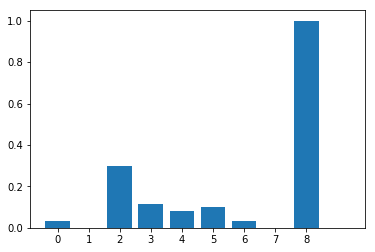

In [0]:
z.max()
plt.figure()
y_pred = model(z.cuda())
preds = y_pred.data.max(1)[1].cpu()
print(preds)
freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
y_pos = np.arange(len(freq[0]))
plt.bar(y_pos, freq[0]/freq[0].max())
plt.xticks(list(range(9)))

In [0]:
# torch.histc(preds.type(torch.FloatTensor), bins=10)
(preds==8).sum()
# numpy.coun
freq

(array([ 2,  0, 18,  7,  5,  6,  2,  0, 60]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

misclassification rate: 1.0
misclassification rate: 1.0
misclassification rate: 0.0
misclassification rate: 1.0
misclassification rate: 1.0
misclassification rate: 0.0
misclassification rate: 1.0
misclassification rate: 0.0
misclassification rate: 1.0
misclassification rate: 1.0
0.7


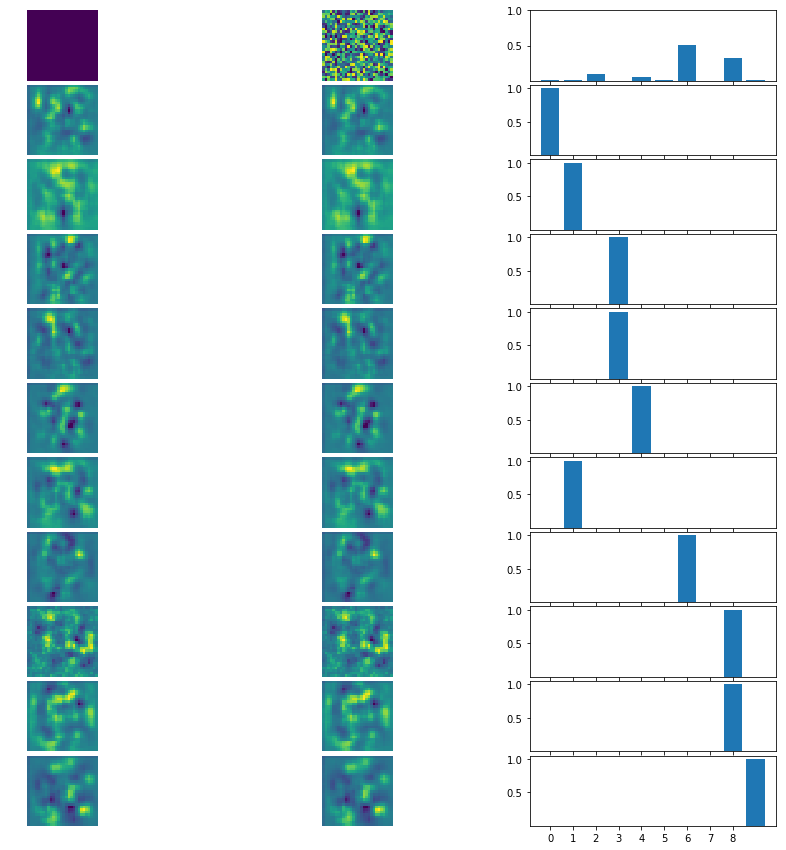

In [57]:
# load the zero image
# objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
save_path = 'drive/My Drive/classification_images/fashionMNIST'

import os

z = torch.rand(10000, 1, 28, 28) #.cuda()
weight = 1

# frequency of noise predictions
f, axarr = plt.subplots(11, 3)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(15)
f.set_figwidth(15)




# fixed noise 
axarr[0,0].imshow(torch.torch.ones_like(torch.squeeze(z[0,...],0)))
axarr[0,0].axis('off')


# fixed noise 
axarr[0,1].imshow(torch.squeeze(z[0,...],0))
axarr[0,1].axis('off')



y_pred = model(z.cuda())
preds = y_pred.data.max(1)[1].cpu()
# print(preds)
freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
y_pos = np.arange(len(freq[0]))
axarr[0,2].bar(y_pos, freq[0]/freq[0].sum())
axarr[0,2].set_yticks([0.5,1]) 
# axarr[0,2].set_xticks(list(range(9))) 
# axarr[0,2].set_ylim([0,1])
# axarr[0,2].axis('on')



# plt.subplots_adjust(hspace=0.01, wspace=0.01)
# plt.show()




# f, axarr = plt.subplots(10, 3, )
# f.set_figheight(15)
# f.set_figwidth(15)

mis_class = []

for i in range(1,11):
  # pattern
  pattern =  io.imread(os.path.join(save_path, str(i-1) + '-.png'))
  pattern = pattern[35:35+217,113:330,:]
  pattern = transform.resize(pattern, (28, 28))
  pattern = torch.from_numpy(pattern)
  pattern = pattern.type(torch.FloatTensor)
  pattern = torch.mean(pattern, dim=2)

  axarr[i,0].imshow(pattern)
  axarr[i,0].axis('off')
  
  

  
  # pattern + noise
  z_new = (1-weight)*z + weight*pattern #/ (weight+1)  # noise + stim
#   z_new = (z_new - z_new.min()) / (z_new.min() - z_new.min())
#   print(z_new.min(),z_new.max())
  axarr[i,1].imshow(torch.squeeze(z_new[0,...],0))
  axarr[i,1].axis('off')

  
  
  
  # frequency of pattern + noise predictions  
  y_pred = model(z_new.cuda())
  preds = y_pred.data.max(1)[1].cpu()
#   print(preds)  
  freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
  y_pos = np.arange(len(freq[0]))
  axarr[i,2].bar(y_pos, freq[0]/freq[0].sum())
  axarr[i,2].set_xticks(list(range(9))) 
  axarr[i,2].set_yticks([0.5,1]) 

  
  f.subplots_adjust(hspace=0.06) #, wspace=0.0, right = 0.8)
  f.show()
  
#   axarr[i,2].axis('off')

  error = (preds == i-1).sum().type(torch.FloatTensor)/preds.size(0)
  print(f'misclassification rate: {error}')
  mis_class.append(error)
  
print(mean(mis_class))

torch.Size([96, 1, 28, 28])

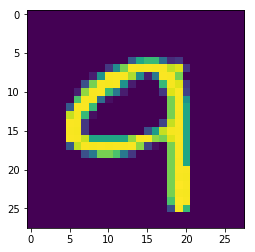

In [0]:
data = data.cpu()
plt.imshow(data[5,0])
data.shape

In [0]:
z.shape
# z.min().shape
# z

torch.Size([10000, 1, 28, 28])

misclassification rate: 0.016899999231100082
misclassification rate: 0.013899999670684338
misclassification rate: 0.012900000438094139
misclassification rate: 0.019600000232458115
misclassification rate: 0.01889999955892563
misclassification rate: 0.016699999570846558
misclassification rate: 0.017799999564886093
misclassification rate: 0.019999999552965164
misclassification rate: 0.01860000006854534
misclassification rate: 0.019600000232458115
0.017490001


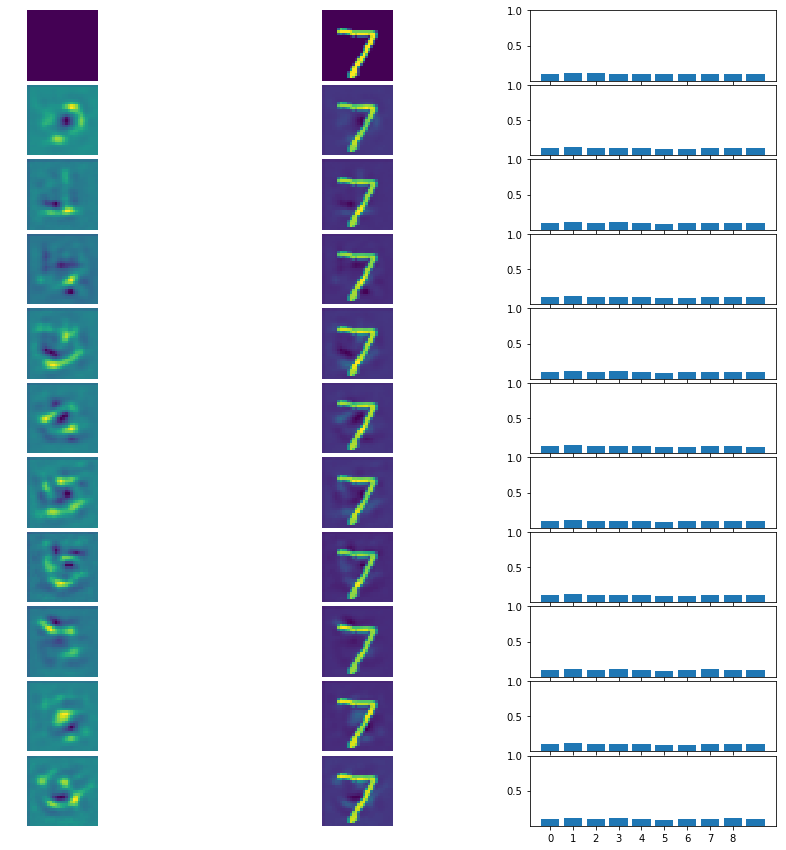

In [0]:

save_path = 'drive/My Drive/classification_images/fashionMNIST'

import os


# z = next(iter(test_loader)) 
z = test.data # 10K test images
z = z[:,None,...]
z = z.type(torch.FloatTensor)
z = (z - z.min())/(z.max() - z.min())



for i in range(1,11):
  # pattern
  pattern =  io.imread(os.path.join(save_path, str(i-1) + '-.png'))
  pattern = pattern[35:35+217,113:330,:]
  pattern = transform.resize(pattern, (28, 28))
  pattern = torch.from_numpy(pattern)
  pattern = pattern.type(torch.FloatTensor)
  pattern = torch.mean(pattern, dim=2)

  axarr[i,0].imshow(pattern)
  axarr[i,0].axis('off')
  
  
  # pattern + noise
  z_new = (1-weight)*z + weight*pattern #/ (weight+1)  # noise + stim
#   z_new = (z_new - z_new.min()) / (z_new.min() - z_new.min())
#   print(z_new.min(),z_new.max())
  axarr[i,1].imshow(torch.squeeze(z_new[0,...],0))
  axarr[i,1].axis('off')
  
  
  # frequency of pattern + noise predictions  
  y_pred = model(z_new.cuda())
  preds = y_pred.data.max(1)[1].cpu()
#   print(preds)  
  freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
  y_pos = np.arange(len(freq[0]))
  axarr[i,2].bar(y_pos, freq[0]/freq[0].sum())
  axarr[i,2].set_xticks(list(range(9))) 
  axarr[i,2].set_yticks([0.5,1]) 
  preds 
  
  f.subplots_adjust(hspace=0.06) #, wspace=0.0, right = 0.8)
  f.show()
  
  
  # targetted attack!
  error = (preds == i-1).sum().type(torch.FloatTensor)/preds.size(0)
  # untargetted attack!
  # error = (preds != test.targets).sum().type(torch.FloatTensor)/preds.size(0)

  print(f'misclassification rate: {error}')
  mis_class.append(error)
  
print(mean(mis_class))

In [0]:
# mean(mis_class)
test.targets

tensor([7, 2, 1,  ..., 4, 5, 6])

In [0]:
pattern =  io.imread(os.path.join(save_path, str(i) + '-.png'))
pattern = transform.resize(pattern, (28, 28))
pattern.shape
pattern = torch.mean(pattern, dim=2)


https://stackoverflow.com/questions/19626530/python-xticks-in-subplots

TypeError: ignored

In [0]:
# digits = next(iter(train_loader))

# 1326/2000

tensor(0.1326)

In [0]:
from torchvision import transforms, datasets
def mnist_data():
    compose = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5), (.5))         
#          transforms.Normalize((.5, .5, .5), (.5, .5, .5))
        ])
    transform = transforms.Compose([
        transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])    
    
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=transform, download=True)




In [0]:
train_loader

AttributeError: ignored

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

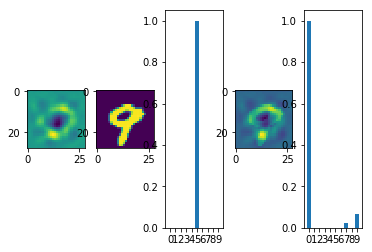

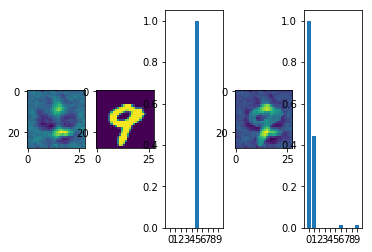

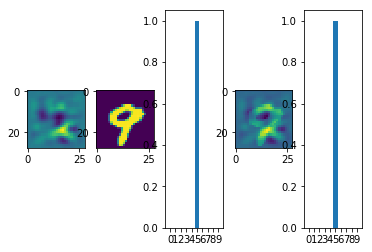

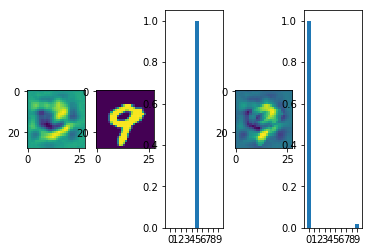

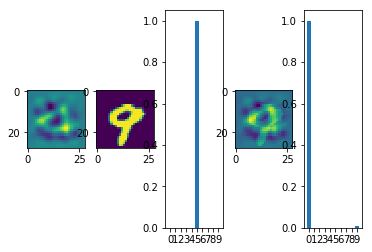

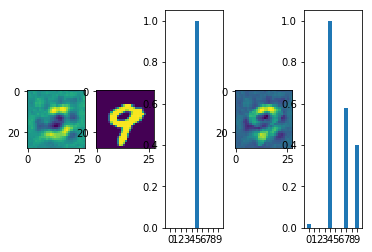

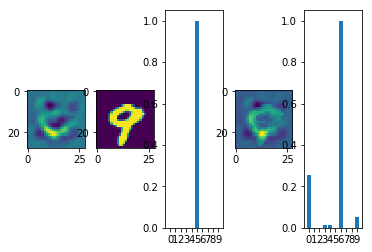

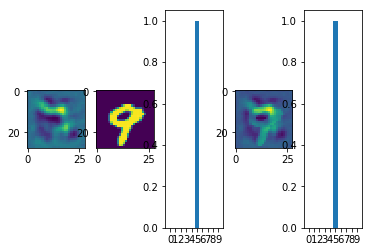

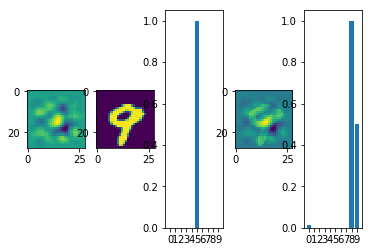

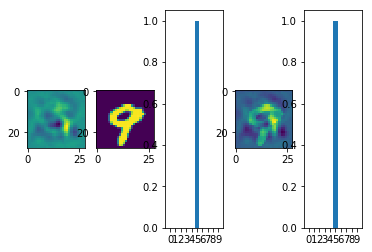

In [0]:
# ls 'drive/My Drive/classification_images'
# torch.squeeze(z[0,...],0).shape
# plt.hist(y_pred.data.max(1)[1].cpu())

objects = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
# evaluate_y = Variable(test_loader.dataset.test_labels)
# if cuda:
#     evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()


#digits = next(iter(train_loader))



# Load data
data = mnist_data()

tt = data.targets[data.targets==9]
dd = data.data[data.targets==9] 
data.targets = tt
data.data = dd
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True, drop_last =True)
# Num batches

z = next(iter(data_loader)) 


for i in range(10):

  pattern =  io.imread(os.path.join(save_path, str(i) + '-.png'))
  pattern = pattern[35:35+217,113:330,0]
  pattern = transform.resize(pattern, (28, 28))
  # pattern = torch.from_numpy(pattern)

  pattern = torch.from_numpy(pattern)
  pattern = pattern.type(torch.FloatTensor)

  plt.figure()
  plt.subplot(151)
  plt.imshow(pattern)

  z_old = (z[0] + 1)/2
  
  plt.subplot(152)
  plt.imshow(torch.squeeze(z_old[0,...],0))

  y_pred = model(z_old.cuda())
  print(y_pred.data.max(1)[1])
  
  
  plt.subplot(153)
  freq = y_pred.data.max(1)[1].cpu()
  aa = numpy.histogram(freq.numpy()) 
  y_pos = np.arange(len(aa[0]))
  plt.bar(y_pos, aa[0]/aa[0].max())
  plt.xticks(y_pos, objects)

  
  z_new = .3*z_old + pattern

  plt.subplot(154)
  plt.imshow(torch.squeeze(z_new[0,...],0))

  y_pred = model(z_new.cuda())
#   print(y_pred.data.max(1)[1])
  
  plt.subplot(155)
  freq = y_pred.data.max(1)[1].cpu()
  aa = numpy.histogram(freq.numpy()) 
  y_pos = np.arange(len(aa[0]))
  plt.bar(y_pos, aa[0]/aa[0].max())
  plt.xticks(y_pos, objects)
  print(y_pred.data.max(1)[1])
#   plt.bar()
#   plt.hist(y_pred.data.max(1)[1].cpu())

In [0]:
  z.min()

tensor(0.)

In [0]:
for i in range(10):
    print(torch.sum(pred==i))

tensor(236, device='cuda:0')
tensor(3, device='cuda:0')
tensor(1874, device='cuda:0')
tensor(160, device='cuda:0')
tensor(2689, device='cuda:0')
tensor(22, device='cuda:0')
tensor(44, device='cuda:0')
tensor(81, device='cuda:0')
tensor(93796, device='cuda:0')
tensor(98, device='cuda:0')


In [0]:
# ls
from google.colab import files
files.download('./*.png')


FileNotFoundError: ignored

In [0]:
ls drive/My\ Drive/classification_images


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


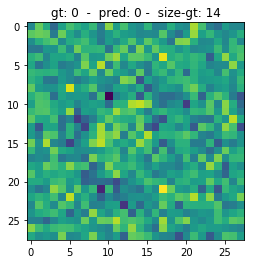

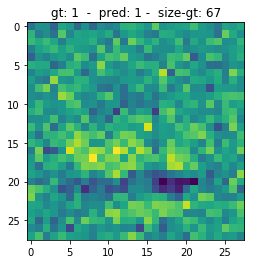

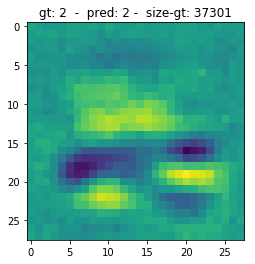

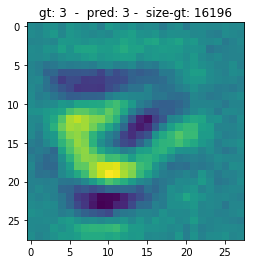

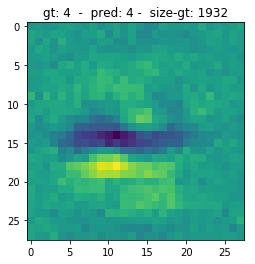

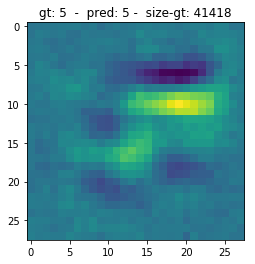

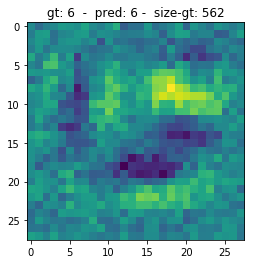

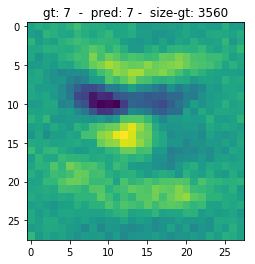

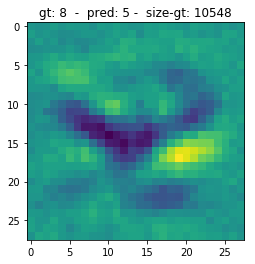

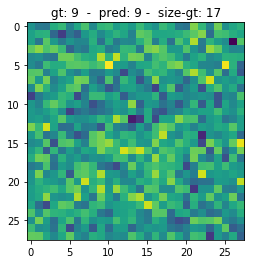

In [0]:
# z = z[all_idx]
pred = torch.cat(all_preds)
for i in range(10):
    plt.figure()
    a = torch.mean(z[pred==i] , dim=0) 
    a = a.view(-1,28)
    b = model(a[None,None,...].cuda())
    c = b.data.max(1)[1]
    plt.title(f'gt: {str(i)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {z[pred==i].size(0)}')
    plt.imshow(1-a)

In [0]:
# for i in range(z.size(0)):
#   print(torch.max(data[1,0]))

In [0]:
# Repeating the above experiment with VGG and ResNet 
# VGG16

# https://towardsdatascience.com/model-summary-in-pytorch-b5a1e4b64d25


import torch
from torchvision import models
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg = models.vgg16().to(device)
summary(vgg, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [0]:
# ResNet

# https://zablo.net/blog/post/using-resnet-for-mnist-in-pytorch-tutorial/


def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model
  
  

def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    ## ... skipped a few lines ...
    return x
  
self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)



class MnistResNet(ResNet):
    def __init__(self):
        super(MnistResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10)
        self.conv1 = torch.nn.Conv2d(1, 64, 
            kernel_size=(7, 7), 
            stride=(2, 2), 
            padding=(3, 3), bias=False)
        
    def forward(self, x):
        return torch.softmax(
            super(MnistResNet, self).forward(x), dim=-1)

      
      
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision.datasets import MNIST
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import time
from torch import nn, optim
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from torch.utils.data import DataLoader





NameError: ignored

In [0]:
# model:
model = YourModelHere()

# params you need to specify:
epochs = 5
train_loader, val_loader = # put your data loader here
loss_function = nn.CrossEntropyLoss() # your loss function, cross entropy works well for multi-class problems

# optimizer, I've used Adadelta, as it wokrs well without any magic numbers
optimizer = optim.Adadelta(model.parameters())

start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

losses = []
batches = len(train_loader)
val_batches = len(val_loader)

# loop for every epoch (training + evaluation)
for epoch in range(epochs):
    total_loss = 0

    # progress bar (works in Jupyter notebook too!)
    progress = tqdm(enumerate(train_loader), desc="Loss: ", total=batches)

    # ----------------- TRAINING  -------------------- 
    # set model to training
    model.train()
    
    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)
        
        # training step for single batch
        model.zero_grad()
        outputs = model(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step()

        # getting training quality data
        current_loss = loss.item()
        total_loss += current_loss

        # updating progress bar
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))
        
    # releasing unceseccary memory in GPU
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # ----------------- VALIDATION  ----------------- 
    val_losses = 0
    precision, recall, f1, accuracy = [], [], [], []
    
    # set model to evaluating (testing)
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            X, y = data[0].to(device), data[1].to(device)

            outputs = model(X) # this get's the prediction from the network

            val_losses += loss_function(outputs, y)

            predicted_classes = torch.max(outputs, 1)[1] # get class from network's prediction
            
            # calculate P/R/F1/A metrics for batch
            for acc, metric in zip((precision, recall, f1, accuracy), 
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculate_metric(metric, y.cpu(), predicted_classes.cpu())
                )
          
    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {val_losses/val_batches}")
    print_scores(precision, recall, f1, accuracy, val_batches)
    losses.append(total_loss/batches) # for plotting learning curve
print(f"Training time: {time.time()-start_ts}s")

SyntaxError: ignored

In [0]:
def calculate_metric(metric_fn, true_y, pred_y):
    # multi class problems need to have averaging method
    if "average" in inspect.getfullargspec(metric_fn).args:
        return metric_fn(true_y, pred_y, average="macro")
    else:
        return metric_fn(true_y, pred_y)
    
def print_scores(p, r, f1, a, batch_size):
    # just an utility printing function
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [0]:
def get_data_loaders(train_batch_size, val_batch_size):
    mnist = MNIST(download=False, train=True, root=".").train_data.float()
    
    data_transform = Compose([ Resize((224, 224)),ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])

    train_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=train_batch_size, shuffle=True)

    val_loader = DataLoader(MNIST(download=False, root=".", transform=data_transform, train=False),
                            batch_size=val_batch_size, shuffle=False)
    return train_loader, val_loader